# Algoritmo PSO para função bidimensional

## Implementação

Abaixo a implementação da classe responsável por executar o PSO, dado alguns parâmetros

In [760]:
import numpy as np
import random

# Redução Linear da Ponderação de Inércia
wmax = 0.9
wmin = 0.4

cmax = 0.9
cmin = 0.4

c1 = 2
c2 = 2
w = 0.5

# Definição de Partícula
class Particle:
    
    def __init__(self,x0,v0,tmax):
        
        self.pbest = np.zeros(2,float)
        self.positions = np.zeros((tmax,2),float)
        self.velocities = np.zeros((tmax,2),float)
        
        self.positions[0] = x0
        self.velocities[0] = v0
        self.pbest = x0
        
    def update_position(self,it,gbest,w):
           
        # Gera números aleatórios entre 0 e 1 para r1 e r2
        r1 = random.random()
        r2 = random.random()

        # Calcular velocidade
        inertia = w*self.velocities[it]
        cognitive = c1*r1*(self.pbest - self.positions[it])
        social = c2*r2*(gbest - self.positions[it])
        
        cognitive = cognitive - it*(cmax - cmin)/cmax
        
        v = inertia + cognitive + social

        # Inseri-los no histórico de iterações
        self.positions[it + 1] = v + self.positions[it]
        self.velocities[it + 1] = v

# Algoritmo PSO
class PSO:    
    def __init__(self,n,tmax,bounds,f):
        
        # Iniciar enxame
        swarm = []
        for i in range(n):
            # Randomiza posição inicial
            x0 = np.array([
                random.uniform(bounds[0][0], bounds[0][1]),
                random.uniform(bounds[1][0], bounds[1][1])
            ],float)
            
            # Velocidade inicial nula
            v0 = np.array([0,0],float)
            
            # Adiciona particular no enxame
            swarm.append(Particle(x0, v0,tmax))
        
        # Iniciar gbest conforme o enxame inicial
        pbest_fitness = [f(particle.pbest) for particle in swarm]
        gbest = swarm[np.argmin(pbest_fitness)].pbest
        
        # Aplicação do algoritmo
        for it in range(0,tmax - 1):
        
            # Atualizar fator de inércia
            w = wmax - it*(wmax - wmin)/tmax
            
            # Análise das posições: atualização do pbest e gbest
            for particle in swarm:

                position = particle.positions[it]
                
                # Verificar se sua posição atual é um pbest
                if f(position) < f(particle.pbest):
                    particle.pbest = position
                
                # Verificar se sua posição atual é um gbest
                if f(position) < f(gbest):
                    gbest = position
            
                # Atualizar posição da particula
                particle.update_position(it,gbest,w)
                
        # Resultados
        self.solution = gbest
        self.minimum = f(gbest)

Finalmente, a chamada da classe

In [801]:
# Função do trabalho
def costf(position):
    
    # Constantes
    a = 500
    b = 0.1
    c = 0.5 * np.pi
    
    # Componentes das coordenadas
    x = position[0]
    y = position[1]
    
    # Funções auxiliares
    z = -x * np.sin(np.sqrt(np.abs(x))) - y * np.sin(np.sqrt(np.abs(y)))
    
    x = x/250
    y = y/250
    
    r = 100 * (y - x**2)**2 + (1 - x)**2
    r1 = (y - x**2)**2 + (1 - x)**2
    rd = 1 + r1
    
    x = 25*x
    y = 25*y
    
    F10 = -a * np.exp(-b * np.sqrt((x**2 + y**2) / 2)) - np.exp((np.cos(c * x) + np.cos(c * y)) / 2) + np.exp(1)
    zsh = 0.5 - ((np.sin(np.sqrt(x**2 + y**2)))**2 - 0.5) / (1 + 0.1 * (x**2 + y**2))**2
    Fobj = F10 * zsh
    
    # Funções compostas
    w4 = np.sqrt(r**2 + z**2) + Fobj
    w23 = z / rd
    w27 = w4 + w23
    w35 = w23 + w27
    
    # Retorno do fitness
    return w35

p = pso.PSO(30,80,((-500,500),(-500,500)),costf)

print(f"{p.minimum} em {p.solution}")

# Cabeçalho do CSV

# with open('./data.csv','a') as file:
#     file.write("particles,iterations,x,y,fitness\n")
#     for n in range(25):
#         # Chamada 1: particulas aumentam de 5 a 30, iterações constantes
#         for i in range(5,30 + 5,5):
#             p = pso.PSO(i,10,((-500,500),(-500,500)),costf)
#             file.write(f"{i},{10},{p.solution[0]},{p.solution[1]},{p.minimum}\n")
#         # Chamada 2: iterações aumentam de 25 a 100, particulas constantes
#         for i in range(25,100 + 25,25):
#             p = pso.PSO(30,i,((-500,500),(-500,500)),costf)
#             file.write(f"{30},{i},{p.solution[0]},{p.solution[1]},{p.minimum}\n")

-498.37037535590855 em [0.14083189 0.07309556]


## Resultados da simulação

Carregar arquivo gerado pelas simulações

In [661]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")

display(data)

,particles,iterations,x,y,fitness
0,5,10,-183.696927,185.663277,-31.384977
1,10,10,207.461055,202.471935,-399.943267
2,15,10,181.608760,218.414330,-246.810681
3,20,10,1.617987,0.707307,-476.860037
4,25,10,207.421104,201.514550,-400.344415
...,...,...,...,...,...
320,30,75,-0.339798,0.538891,-494.683730
321,30,100,210.916307,200.021266,-402.148491
322,30,125,0.272369,0.707049,-493.651953
323,30,150,211.037329,200.640126,-402.220534


## Cenário 1

Particulas aumentam, iterações constantes 

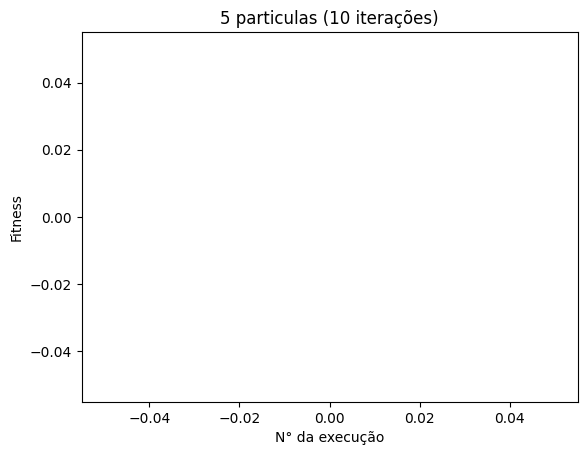

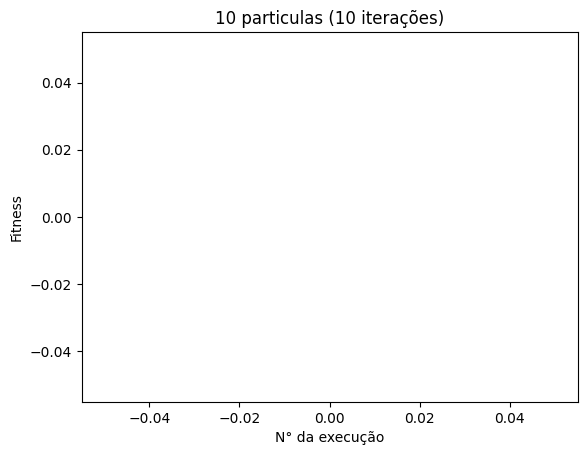

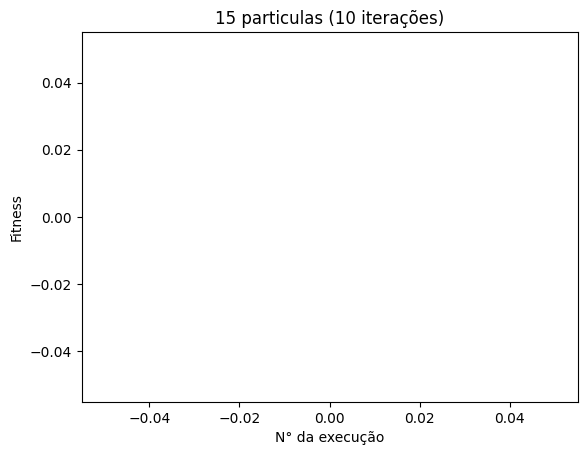

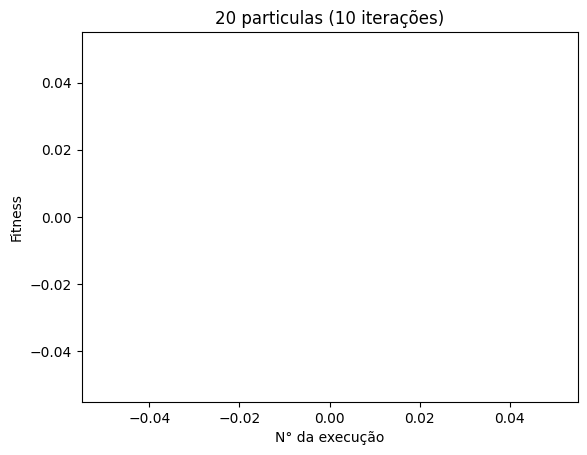

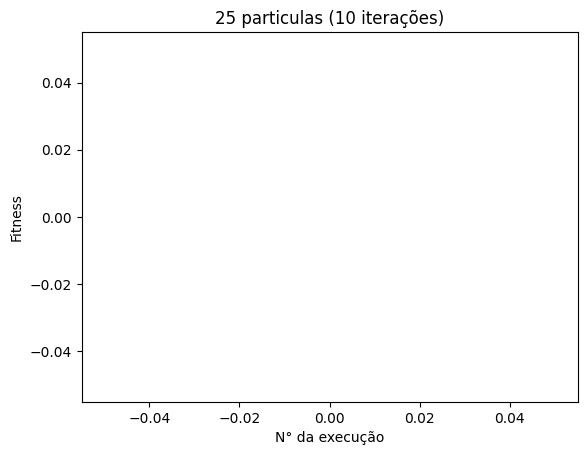

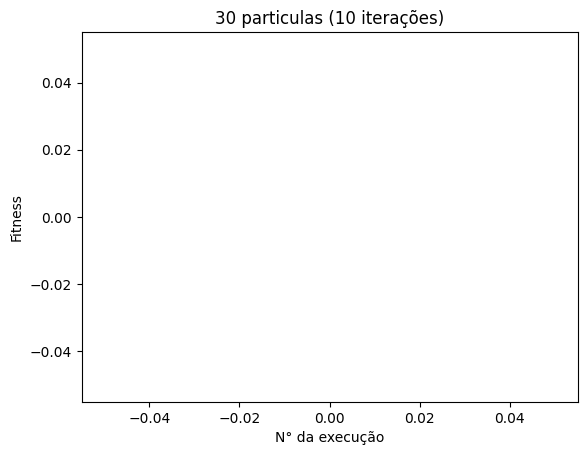

In [656]:
df_constit = data.query("iterations == 10")
df_constit.reset_index(inplace=True)

for i in range(5,30 + 5,5):
    df = df_constit.query(f"particles == {i}")
    executions = [index for index, element in enumerate(df['fitness'])]
    fitness = df['fitness']

    fig, ax = plt.subplots()

    ax.scatter(executions,fitness)

    plt.title(f"{i} particulas (10 iterações)")
    plt.plot(executions, fitness, 'b')
    plt.xlabel("N° da execução")
    plt.ylabel("Fitness")


## Cenário II

Iterações aumentam, número de particulas constantes

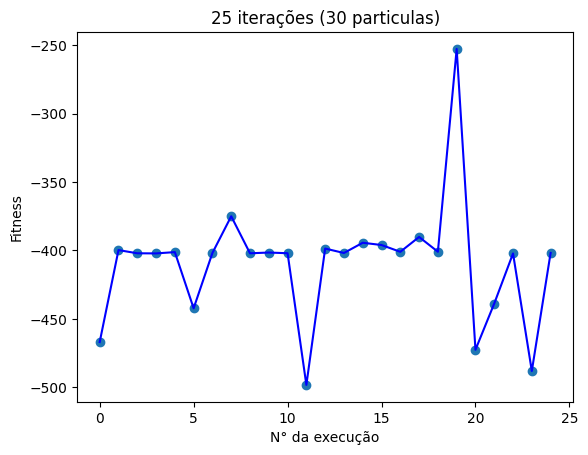

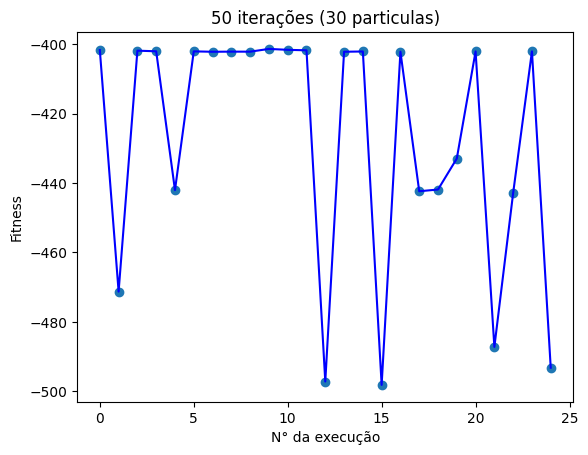

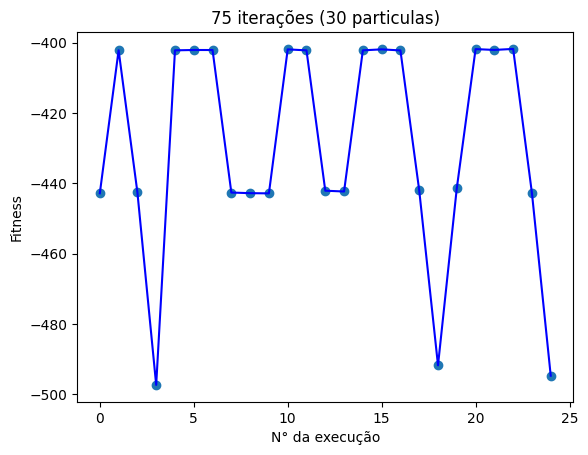

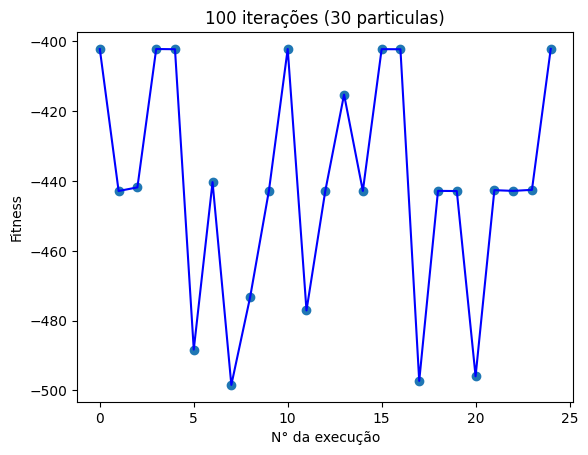

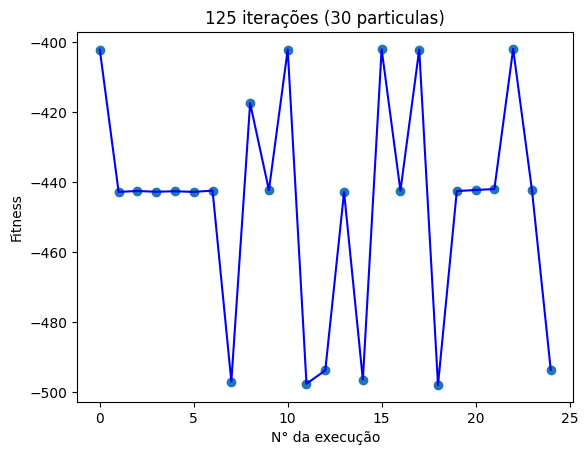

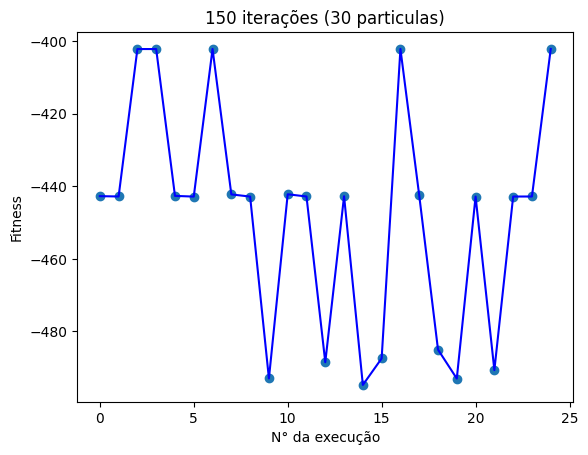

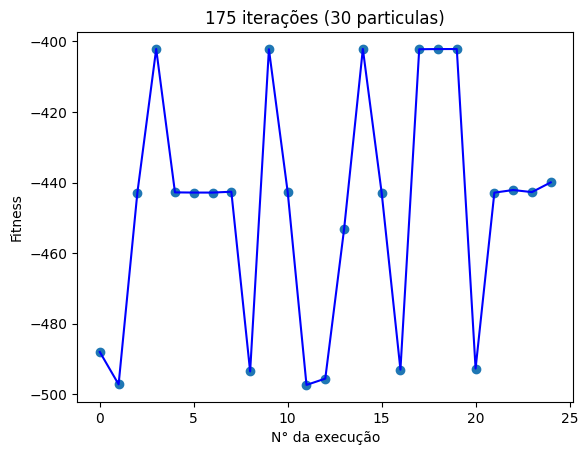

In [663]:
df_constpart = data.query("particles == 30")
df_constpart.reset_index(inplace=True)

for i in range(25,100 + 25,25):
    df = df_constpart.query(f"iterations == {i}")
    executions = [index for index, element in enumerate(df['fitness'])]
    fitness = df['fitness']

    fig, ax = plt.subplots()

    ax.scatter(executions,fitness)

    plt.title(f"{i} iterações (30 particulas)")
    plt.plot(executions, fitness, 'b')
    plt.xlabel("N° da execução")
    plt.ylabel("Fitness")